<a href="https://colab.research.google.com/github/SomalinRout/SomalinRout/blob/main/Project_4_Distracted_Driver_MultiAction_Classification_SomalinRout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2022-08-12 05:18:40--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2022-08-12 05:18:41--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccab58d3ec5e66d9af9a520abe8.dl.dropboxusercontent.com/cd/0/inline/Bq0ZBHkymop3UFsRSl6W6G15EM2n7oNipeVuTi6i30DdW229wD97zmN19qm3V2zXtPPjkbpwWey_gNpvnDl366YB7loDSFZCRjP-w6YUwg8Pf1YvxA63-027T6c5-C6mOj8s8tqnGupRA4g1f296rHNBFRabK7en_QmhzAGPZSw-Qg/file# [following]
--2022-08-12 05:18:41--  https://uccab58d3ec5e66d9af9a520abe8.dl.dropboxuse

In [3]:
!unzip /content/state-farm-distracted-driver-detection.zip

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip /content/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,Activation, BatchNormalization

**Total Images in Training Set**

In [7]:
print(len((os.listdir('train/c0'))) + len((os.listdir('train/c1')))+len((os.listdir('train/c2')))+
      len((os.listdir('train/c3')))+len((os.listdir('train/c4')))+len((os.listdir('train/c5')))+len((os.listdir('train/c6')))
      +len((os.listdir('train/c7')))+len((os.listdir('train/c8')))+len((os.listdir('train/c9'))))

22424


**Total Images in Test Set**

In [8]:
print(len(os.listdir('test')))

79726


**Checking for Train Images using CV2 & matlplotlib)**

---



In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [10]:
#classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
classes = ['c9']

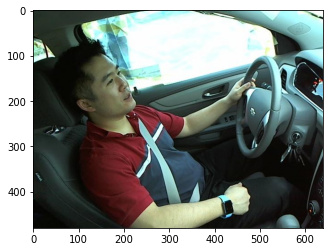

In [11]:
for i in classes:
    path = os.path.join('/content/train',i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

In [12]:
img_array.shape

(480, 640, 3)

**Checking for test image using Tensorflow**

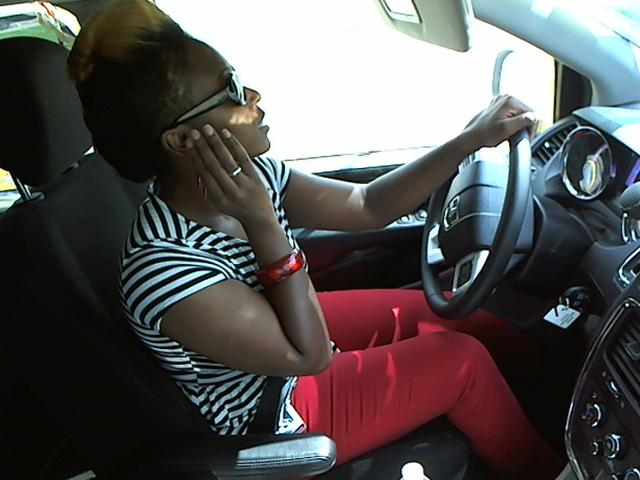

In [13]:
data_dir = tf.keras.utils.load_img('/content/test/img_1000.jpg',grayscale=False,color_mode='rgb',target_size=None,interpolation='nearest')
data_dir

In [14]:
data_dir.getpixel

<bound method Image.getpixel of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F82EA371750>>

**CNN Model**

In [15]:
model=Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
%mkdir Test
!mv /content/test/  /content/Test

In [22]:
train_generator = train_datagen.flow_from_directory('/content/train',target_size=(240,240),batch_size=70,
        class_mode='categorical',subset='training')

validation_generator = train_datagen.flow_from_directory('/content/train',target_size=(240, 240),batch_size=70,
        class_mode='categorical',subset='validation')


test_generator = test_datagen.flow_from_directory('/content/Test',target_size=(240, 240),batch_size=2,
        shuffle=False,class_mode='categorical')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [23]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [24]:
STEPS_PER_EPOCH,VALIDATION_STEPS

(256, 64)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 238, 238, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 238, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 238, 238, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                        

In [26]:
results = model.fit(train_generator,steps_per_epoch=STEPS_PER_EPOCH,epochs=20,validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS,verbose=1,callbacks=callback)

Epoch 1/20
256/256 [==============================] - 404s 2s/step - loss: 2.5282 - accuracy: 0.1361 - val_loss: 8.1888 - val_accuracy: 0.1036
Epoch 2/20
256/256 [==============================] - 377s 1s/step - loss: 2.1260 - accuracy: 0.2309 - val_loss: 13.8868 - val_accuracy: 0.0902
Epoch 3/20
256/256 [==============================] - 375s 1s/step - loss: 1.9196 - accuracy: 0.3003 - val_loss: 2.1041 - val_accuracy: 0.2908
Epoch 4/20
256/256 [==============================] - 375s 1s/step - loss: 1.6855 - accuracy: 0.3851 - val_loss: 1.8616 - val_accuracy: 0.3277
Epoch 5/20
256/256 [==============================] - 374s 1s/step - loss: 1.4718 - accuracy: 0.4666 - val_loss: 1.3601 - val_accuracy: 0.5248
Epoch 6/20
256/256 [==============================] - 377s 1s/step - loss: 1.2830 - accuracy: 0.5411 - val_loss: 1.3474 - val_accuracy: 0.5283
Epoch 7/20
256/256 [==============================] - 374s 1s/step - loss: 1.1275 - accuracy: 0.6017 - val_loss: 1.2097 - val_accuracy: 0.587

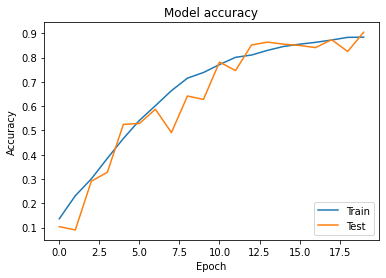

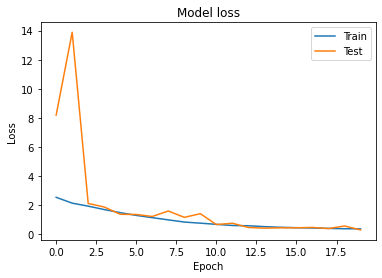

In [27]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**Prediction on Test Image Data**

In [28]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

39863/39863 [==============================] - 568s 14ms/step


In [29]:
pred

array([[1.9848656e-03, 1.6655984e-05, 1.6426671e-06, ..., 2.4580431e-05,
        5.8412942e-04, 5.0911680e-04],
       [2.3367201e-04, 9.4326481e-08, 1.4300024e-07, ..., 2.1649021e-06,
        1.6724842e-03, 1.8725843e-04],
       [8.6296853e-03, 4.2856741e-01, 1.6000912e-02, ..., 4.3695053e-01,
        3.8459366e-03, 6.1611058e-03],
       ...,
       [1.9227968e-01, 5.3644434e-02, 1.9268071e-02, ..., 5.6701596e-04,
        2.0651141e-01, 2.4753409e-02],
       [1.9222488e-11, 9.1831744e-11, 1.0778086e-04, ..., 2.4829514e-16,
        8.7298040e-06, 6.6773339e-13],
       [3.0208271e-06, 3.0899042e-12, 5.9085965e-11, ..., 2.5416422e-12,
        6.9695993e-06, 2.9010906e-05]], dtype=float32)

In [30]:
len(pred)

79726

In [31]:
labels_test_submission = pd.DataFrame(pred)
labels_test_submission

,0,1,2,3,4,5,6,7,8,9
0,1.984866e-03,1.665598e-05,1.642667e-06,1.813320e-02,1.022169e-03,9.777128e-01,1.086035e-05,2.458043e-05,0.000584,5.091168e-04
1,2.336720e-04,9.432648e-08,1.430002e-07,2.226414e-04,1.622823e-04,9.975181e-01,1.293961e-06,2.164902e-06,0.001672,1.872584e-04
2,8.629685e-03,4.285674e-01,1.600091e-02,9.685960e-02,4.469330e-04,2.398666e-03,1.392310e-04,4.369505e-01,0.003846,6.161106e-03
3,1.828061e-06,7.910670e-09,1.005153e-02,2.883529e-10,3.299861e-07,9.989782e-06,5.358165e-03,9.709750e-07,0.984548,2.921527e-05
4,2.223672e-02,2.053186e-03,1.467461e-05,9.303200e-01,1.903804e-02,2.857295e-03,3.226052e-05,1.183766e-05,0.013290,1.014563e-02
...,...,...,...,...,...,...,...,...,...,...
79721,8.341045e-03,9.803254e-01,8.841184e-05,1.116913e-04,7.105812e-05,1.022285e-04,1.688617e-03,6.857995e-04,0.003038,5.547354e-03
79722,9.043945e-05,7.778570e-04,4.955625e-07,9.987116e-01,3.540858e-04,3.574182e-05,4.193837e-07,1.614738e-06,0.000007,2.053117e-05
79723,1.922797e-01,5.364443e-02,1.926807e-02,7.374725e-03,2.048884e-01,3.608395e-03,2.871045e-01,5.670160e-04,0.206511,2.475341e-02
79724,1.922249e-11,9.183174e-11,1.077809e-04,4.132037e-17,5.697084e-10,1.539365e-10,9.998835e-01,2.482951e-16,0.000009,6.677334e-13


In [32]:
labels_test_submission.to_csv('Distracted_Driver_MultiAction_Classification_SomalinRout.csv',index=False)

**test Few sample images**

In [33]:
from tensorflow.keras.preprocessing import image  

In [52]:
img = image.load_img(r'/content/Test/test/img_3.jpg', target_size=(240,240))

In [53]:
x = image.img_to_array(img)
#x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
pred1 = model.predict(x)[0]

In [54]:
pred1

array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 5.654244e-23, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)